In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



In [2]:
df = pd.read_csv('Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [5]:
df['Male'] = df['Gender'].transform(lambda x: 1 if x == 'Male' else 0)

In [6]:
df.drop('Gender', axis=1, inplace=True)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [7]:
df['income'] = df['Annual Income (k$)']
df.drop('Annual Income (k$)',axis=1, inplace=True)

In [8]:
df.drop('CustomerID', axis=1, inplace=True)

In [9]:
age_bins = [0, 29, 49, 100]

age_labels = ['Young Adult', 'Middle_Aged', 'Senior']

df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


print(df.head())

   Age  Spending Score (1-100)  Male  income    Age_Group
0   19                      39     1      15  Young Adult
1   21                      81     1      15  Young Adult
2   20                       6     0      16  Young Adult
3   23                      77     0      16  Young Adult
4   31                      40     0      17  Middle_Aged


<Axes: xlabel='Age_Group', ylabel='Count'>

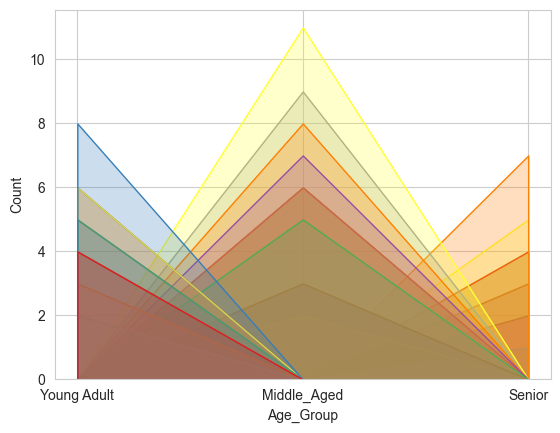

In [10]:
sns.histplot(data = df, x = 'Age_Group', palette = 'Set1', hue= 'Age', legend=False,element='poly')

In [11]:
df['spend'] = df['Spending Score (1-100)']
df.drop('Spending Score (1-100)',axis = 1, inplace=True)

In [12]:
df

,Age,Male,income,Age_Group,spend
0,19,1,15,Young Adult,39
1,21,1,15,Young Adult,81
2,20,0,16,Young Adult,6
3,23,0,16,Young Adult,77
4,31,0,17,Middle_Aged,40
...,...,...,...,...,...
195,35,0,120,Middle_Aged,79
196,45,0,126,Middle_Aged,28
197,32,1,126,Middle_Aged,74
198,32,1,137,Middle_Aged,18


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df2 = df.copy()
df_num = df2[ ['income', 'spend']]

scaler = StandardScaler()
scaled = scaler.fit_transform(df_num)

scaled = pd.DataFrame(scaled, columns=[[ 'income', 'spend']])
scaled.head()


,income,spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [15]:
#df['income'] = scaled['income']
#df['spend'] = scaled['spend']
df.head()

,Age,Male,income,Age_Group,spend
0,19,1,15,Young Adult,39
1,21,1,15,Young Adult,81
2,20,0,16,Young Adult,6
3,23,0,16,Young Adult,77
4,31,0,17,Middle_Aged,40


In [16]:
from sklearn.cluster import KMeans


X = scaled[['income', 'spend']]

wcss = []

r = np.arange(1, 35) 
_k = -1
threshold = 0.15

for k in r:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=37)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    if k > 1 and _k == -1:
        change = (wcss[-2] - wcss[-1]) / wcss[-2]
        if change < threshold:
            _k = k

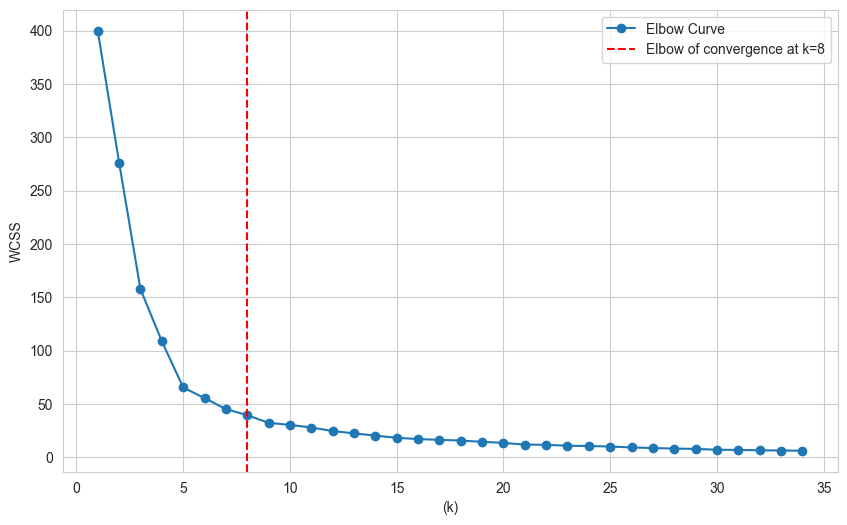

In [17]:

plt.figure(figsize=(10, 6))
plt.plot(r, wcss, marker='o', linestyle='-', label='Elbow Curve')
plt.axvline(x=_k,color='r', linestyle='--',label = f'Elbow of convergence at k={_k}')
plt.xlabel('(k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.legend()
plt.show()

TypeError: 'Axes' object is not callable

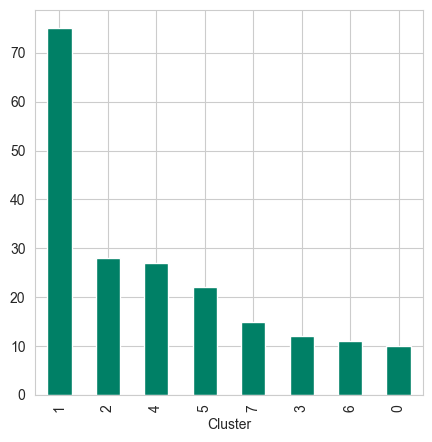

In [18]:
kmeans = KMeans(n_clusters=_k, init='k-means++', n_init='auto', random_state=37)
df['Cluster'] = kmeans.fit_predict(X)
df.Cluster.value_counts().plot(kind='bar',figsize=(5,5),cmap='summer')()

<Axes: xlabel='income', ylabel='spend'>

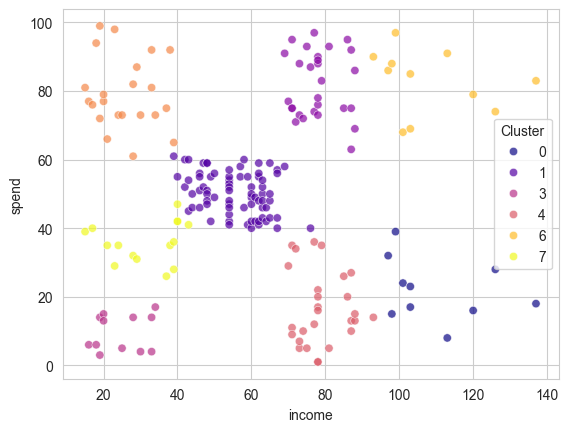

In [19]:
sns.scatterplot(x=df.income, y=df.spend, hue='Cluster', data=df,palette='plasma',legend=True,alpha=0.7)

In [20]:
df['Cluster'] = kmeans.labels_

persona_analysis = df.groupby('Cluster')[['income', 'spend', 'Age']].mean()

print("Customer Personas:")
persona_analysis

Customer Personas:


,income,spend,Age
Cluster,,,
0,109.700000,22.000000,41.000000
1,55.640000,50.266667,43.440000
2,78.035714,81.892857,32.785714
3,24.583333,9.583333,48.750000
4,79.000000,16.592593,40.629630
5,25.727273,79.363636,25.272727
6,108.181818,82.727273,32.454545
7,31.533333,35.866667,39.266667


In [21]:
unscaled = scaler.inverse_transform(kmeans.cluster_centers_)

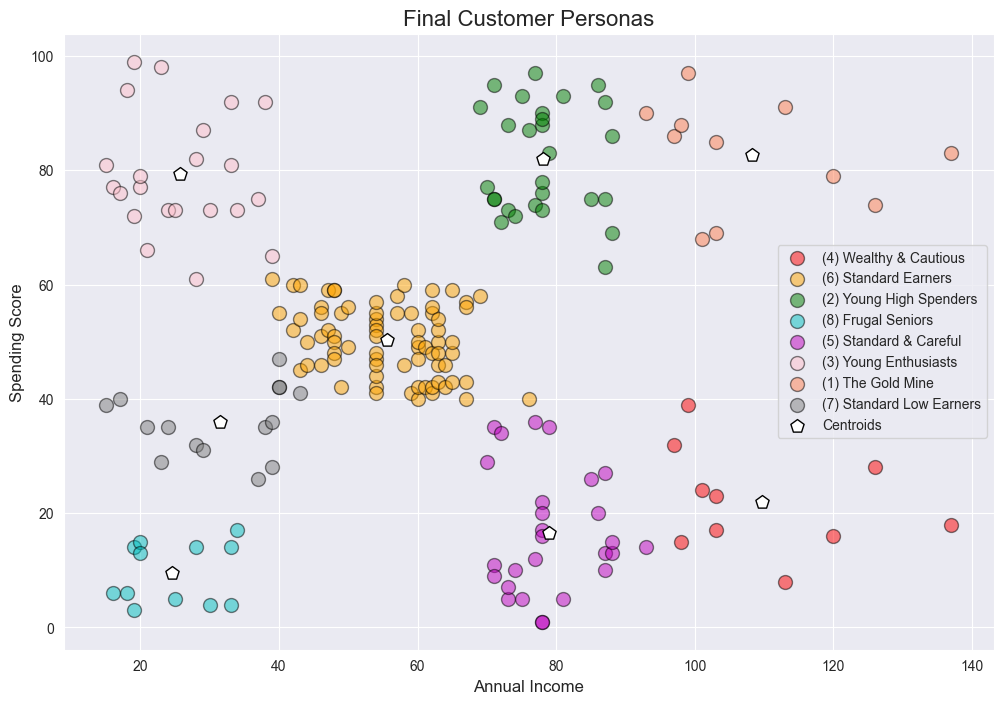

In [22]:

y_kmeans = kmeans.labels_
X = df[['income', 'spend']].values

persona_map = {
    6: '(1) The Gold Mine',
    2: '(2) Young High Spenders',
    5: '(3) Young Enthusiasts',
    0: '(4) Wealthy & Cautious',
    4: '(5) Standard & Careful',
    1: '(6) Standard Earners',
    7: '(7) Standard Low Earners',
    3: '(8) Frugal Seniors'
}
colors =['r','orange','g','c','m','pink','coral','grey']
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
for i in range(0,8):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label=persona_map[i],alpha=0.5,edgecolor='black')

plt.scatter(unscaled[:, 0], unscaled[:, 1], s=100, c='white', edgecolor='black', label='Centroids', marker='p')



plt.title('Final Customer Personas', fontsize=16)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('Final Customer Personas.png')
plt.show()